# Mental HealthCare Analysis

## Data Preprocessing

In [12]:
# Import neccessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
df = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv')

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

In [15]:
print(df.columns)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')


In [16]:
print(df.head().to_string())

                                                       Indicator   Group          State       Subgroup Phase  Time Period           Time Period Label Time Period Start Date Time Period End Date  Value  LowCI  HighCI Confidence Interval Quartile Range  Suppression Flag
0                   Received Counseling or Therapy, Last 4 Weeks  By Sex  United States           Male     2           15       Sep 16 - Sep 28, 2020             09/16/2020           09/28/2020    6.9    6.5     7.3           6.5 - 7.3            NaN               NaN
1                   Received Counseling or Therapy, Last 4 Weeks  By Sex  United States         Female     2           15       Sep 16 - Sep 28, 2020             09/16/2020           09/28/2020   11.0   10.4    11.6         10.4 - 11.6            NaN               NaN
2  Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks  By Sex  United States         Female    -1            1  Dec 22, 2020 - Jan 5, 2021             12/22/2020           01/05/2021

In [17]:
print(df.tail().to_string())

                                                           Indicator     Group          State       Subgroup Phase  Time Period     Time Period Label Time Period Start Date Time Period End Date  Value  LowCI  HighCI Confidence Interval Quartile Range  Suppression Flag
10399  Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks  By State       Virginia       Virginia   3.4           45  Apr 27 - May 9, 2022             04/27/2022           05/09/2022   10.1    7.1    13.8          7.1 - 13.8       9.6-11.3               NaN
10400  Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks  By State     Washington     Washington   3.4           45  Apr 27 - May 9, 2022             04/27/2022           05/09/2022   14.8   12.5    17.4         12.5 - 17.4      13.0-20.8               NaN
10401  Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks  By State  West Virginia  West Virginia   3.4           45  Apr 27 - May 9, 2022             04/27/2022           05/09/2022

In [18]:
print(df.isnull().sum())

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64


In [19]:
# Dropping unnecessary columns
new_df = df.drop(columns=['Suppression Flag', 'Quartile Range'])

In [21]:
new_df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval'],
      dtype='object')

In [22]:
# Handling missing values and correcting column typo
new_df = new_df.fillna(0)

In [23]:
# Converting date columns
new_df['Time Period Start Date'] = pd.to_datetime(new_df['Time Period Start Date'], errors='coerce')
new_df['Time Period End Date'] = pd.to_datetime(new_df['Time Period End Date'], errors='coerce')

## Exploratory Data Analysis

### 1. Demographic Comparison

In [24]:
labels = [
    "Sexual orientation", "Gender identity", "Disability status",
    "State", "Anxiety/Depression Symptoms", "National Estimate",
    "Sex", "Education", "Age", "Race/Ethnicity"
]

# Placeholder values - replace with actual averages if you have them
avg_values = [12.5, 14.2, 10.1, 11.5, 13.6, 9.8, 10.9, 12.1, 11.3, 13.0]

demographic_df = pd.DataFrame({
    'Demographic Group': labels,
    'Average Value (%)': avg_values
})

C:\Users\RITUL\AppData\Local\Temp\ipykernel_48564\861045570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Demographic Group', y='Average Value (%)', data=demographic_df, palette='coolwarm')


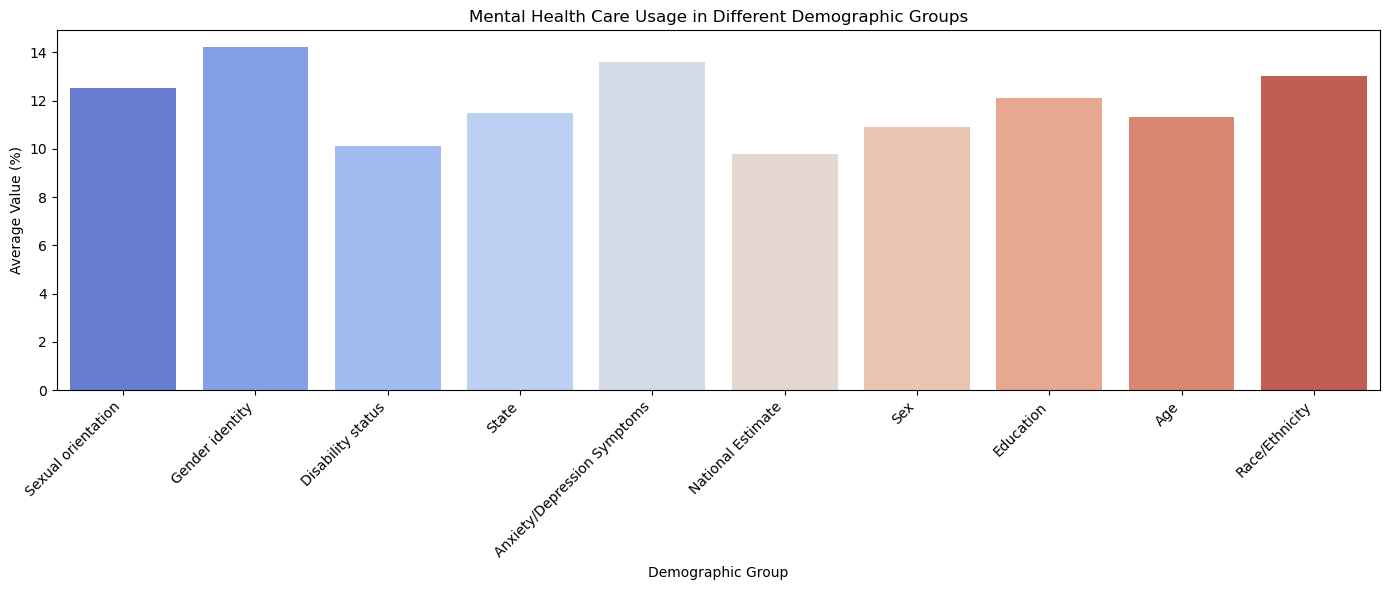

In [33]:
# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x='Demographic Group', y='Average Value (%)', data=demographic_df, palette='coolwarm')
plt.title("Mental Health Care Usage in Different Demographic Groups")
plt.xlabel("Demographic Group")
plt.ylabel("Average Value (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. Trends Over Time

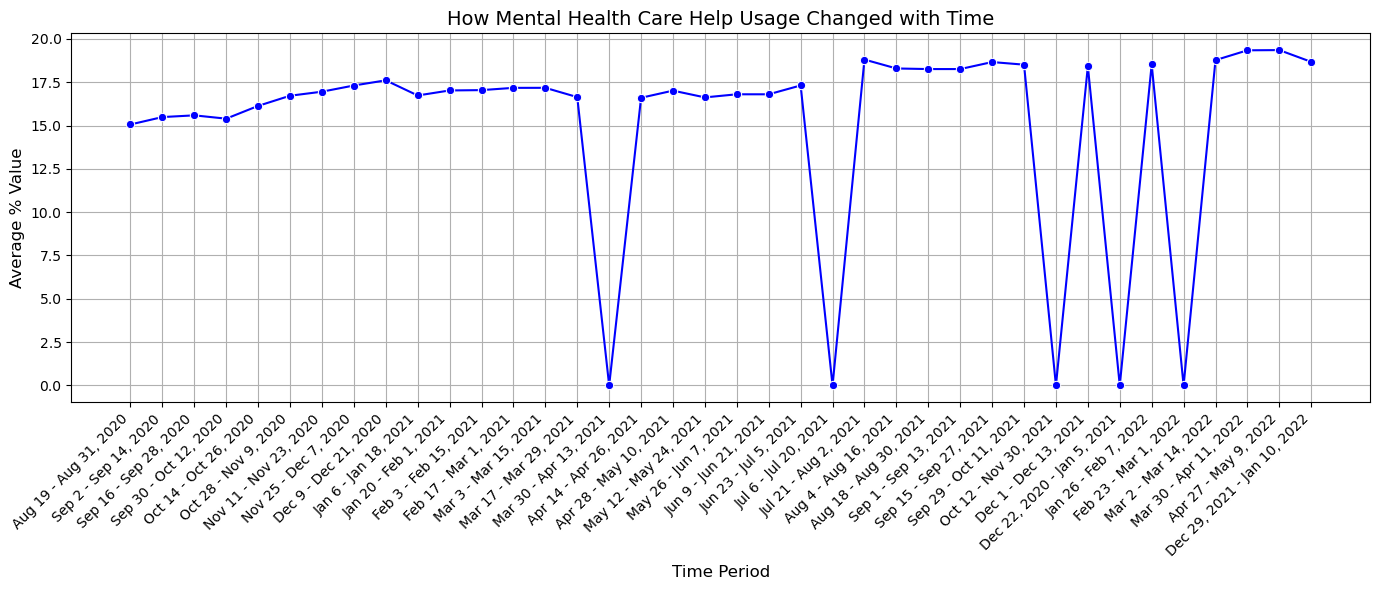

In [53]:
import re
from datetime import datetime

def extract_start_date(label):
    # Extract the first date in the format "Apr 14 - Apr 26, 2021"
    match = re.match(r"([A-Za-z]+ \d+)", label)
    year_match = re.search(r"(\d{4})$", label)
    if match and year_match:
        date_str = match.group(1) + ", " + year_match.group(1)
        return datetime.strptime(date_str, "%b %d, %Y")
    return pd.NaT

def analyze_trends_over_time(data):
    data = data.copy()
    # Convert string time periods into sortable datetime values
    data['Start Date'] = data['Time Period Label'].apply(extract_start_date)

    # Group and sort
    trends = (
        data.groupby(['Time Period Label', 'Start Date'])['Value']
        .mean()
        .reset_index()
        .sort_values('Start Date')
    )

    # Plot
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=trends, x='Time Period Label', y='Value', marker='o', color='blue')
    plt.title('How Mental Health Care Help Usage Changed with Time', fontsize=14)
    plt.xlabel('Time Period', fontsize=12)
    plt.ylabel('Average % Value', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
analyze_trends_over_time(new_df)

### 3. State-Wise Analysis

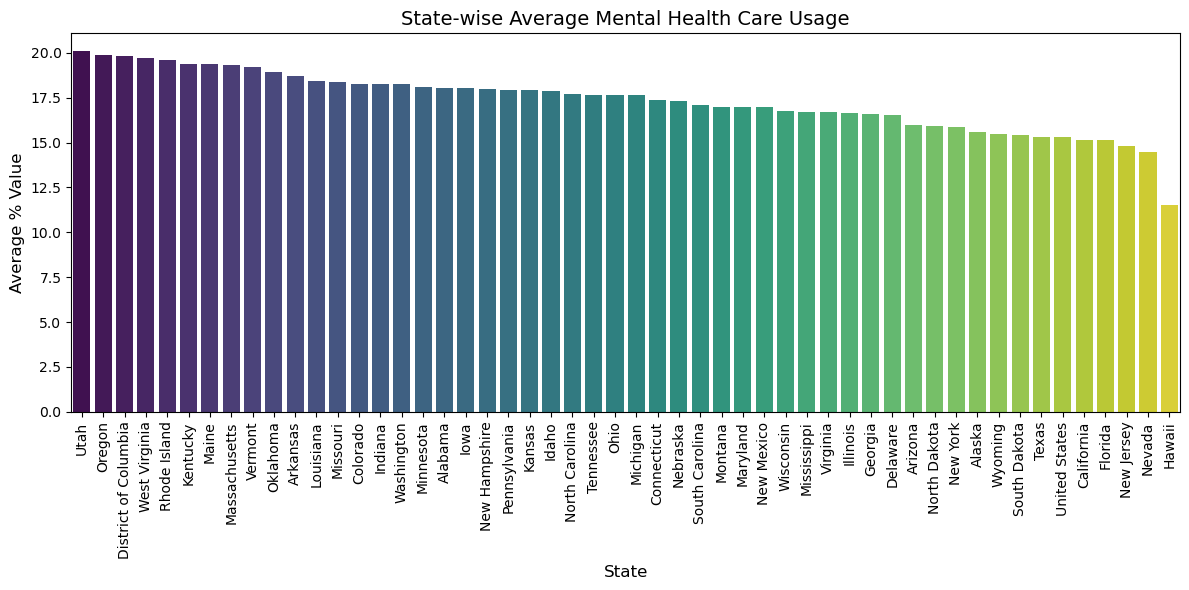

In [61]:
def state_wise_analysis(data):
    states = data.groupby('State')['Value'].mean().sort_values(ascending=False).reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=states, x='State', y='Value', hue='State', palette='viridis', legend=False)
    plt.title('State-wise Average Mental Health Care Usage', fontsize=14)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Average % Value', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
state_wise_analysis(new_df)

### 4. Heatmap (State x Time)

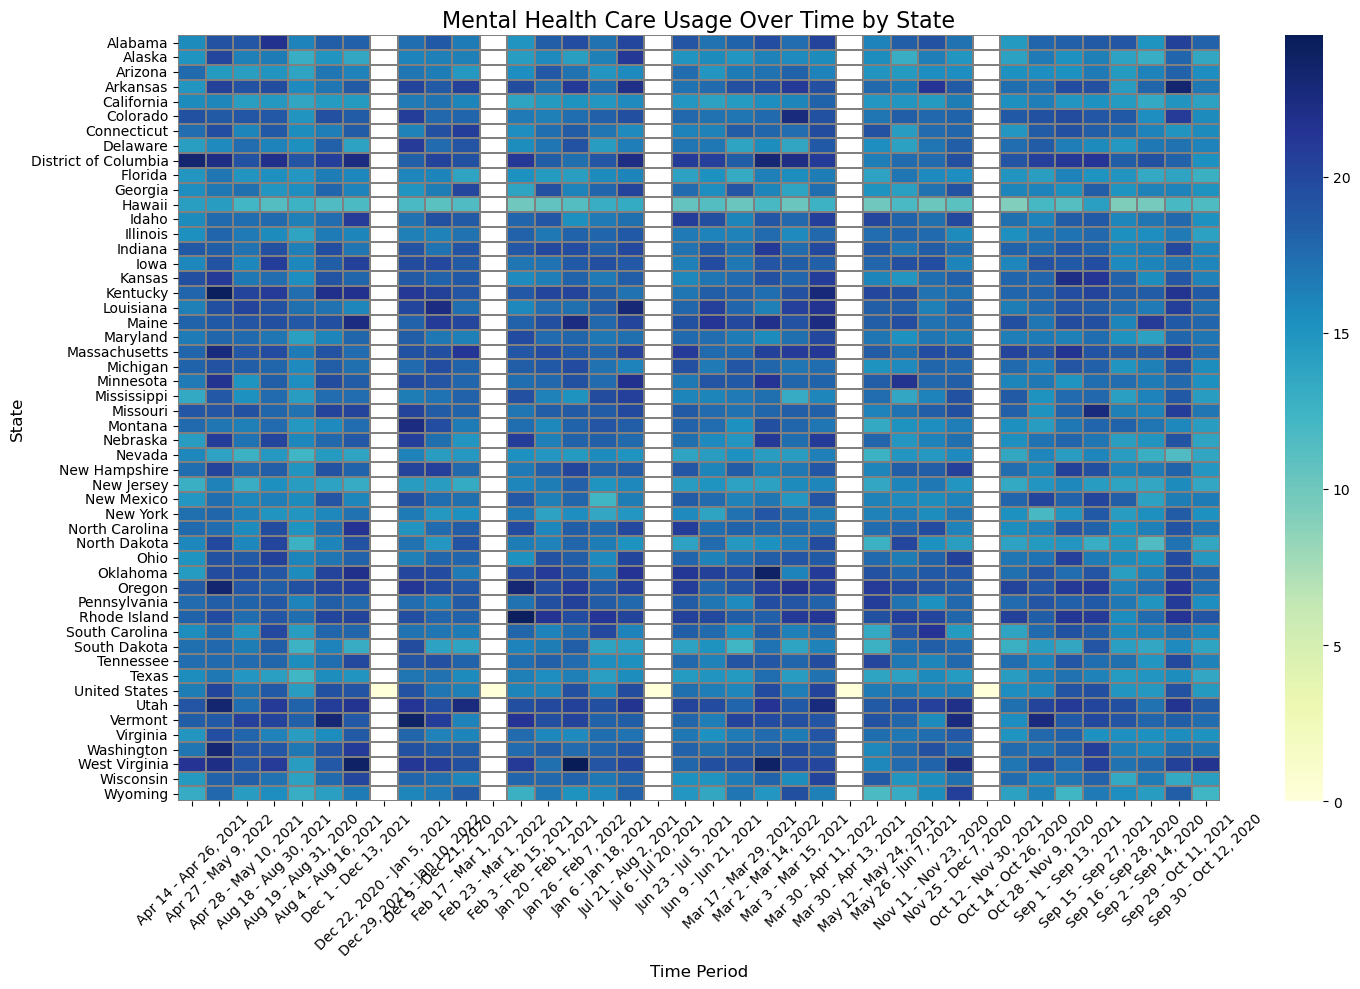

In [63]:
def heatmap_state_time(data):
    heatmap_data = data.pivot_table(
        index='State',
        columns='Time Period Label',
        values='Value',
        aggfunc='mean'
    )

    plt.figure(figsize=(15, 10))
    sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3, linecolor='gray')
    plt.title('Mental Health Care Usage Over Time by State', fontsize=16)
    plt.xlabel('Time Period', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
heatmap_state_time(new_df)

### 5. Confidence Interval Analysis

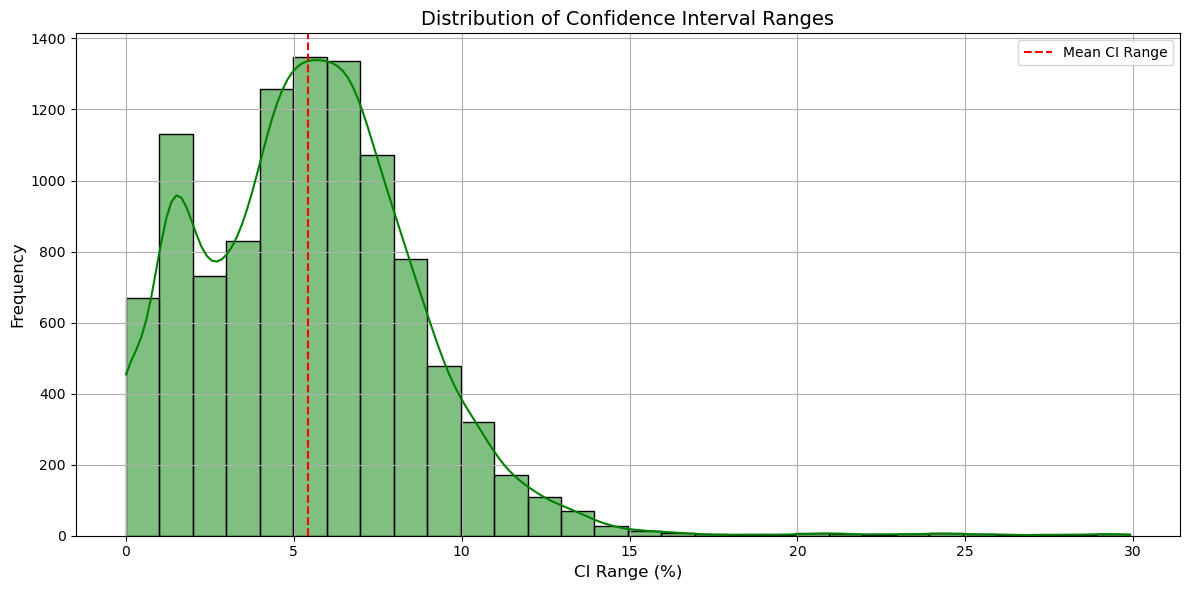

In [75]:
def analyze_confidence_intervals(data):
    ci_data = data.dropna(subset=['LowCI', 'HighCI']).copy()
    ci_data['CI Range'] = ci_data['HighCI'] - ci_data['LowCI']

    plt.figure(figsize=(12, 6))
    sns.histplot(ci_data['CI Range'], bins=30, kde=True, color='green')
    plt.axvline(ci_data['CI Range'].mean(), color='red', linestyle='--', label='Mean CI Range')
    plt.title('Distribution of Confidence Interval Ranges', fontsize=14)
    plt.xlabel('CI Range (%)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
analyze_confidence_intervals(new_df)